In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import tensorflow as tf

# Check if a GPU is available and which GPU is in use
if tf.test.gpu_device_name():
    print('GPU found:', tf.test.gpu_device_name())
else:
    print('No GPU found. Using CPU instead.')


GPU found: /device:GPU:0


In [3]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.7 MB/s eta 0:00:00


# New Section

In [4]:
df1=pd.read_csv("/content/drive/MyDrive/Reviews.csv")

In [5]:
print(df1.shape)


(568454, 10)


In [6]:
df=df1.head(500)
df.shape

(500, 10)

In [7]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


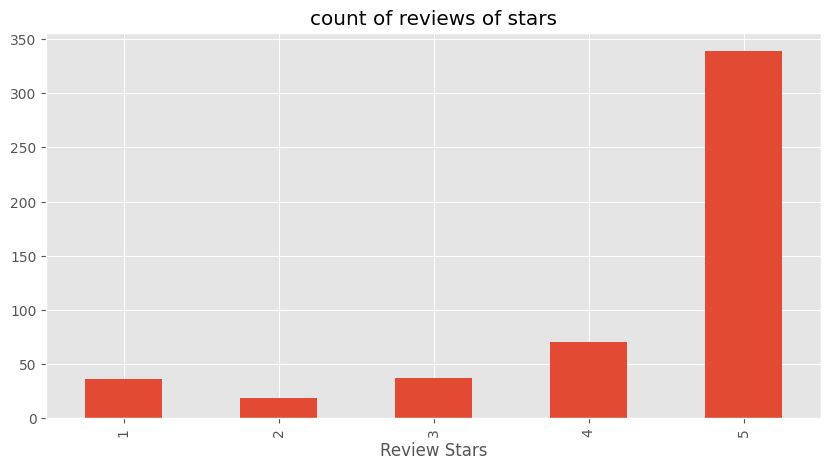

In [8]:
#EDA
ax=df['Score'].value_counts().sort_index().plot(
    kind='bar',
    title='count of reviews of stars',
    figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [9]:
#NLTK
example=df['Text'].values[50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [10]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [11]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [12]:
tagged=nltk.pos_tag(tokens)

In [13]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [14]:
#VADER
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia=SentimentIntensityAnalyzer()

In [15]:
sia.polarity_scores("I am excited!")

{'neg': 0.0, 'neu': 0.271, 'pos': 0.729, 'compound': 0.4003}

In [16]:
result={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  text=row['Text']
  myid=row['Id']
  result[myid]=sia.polarity_scores(text)


  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
vaders=pd.DataFrame(result).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [19]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


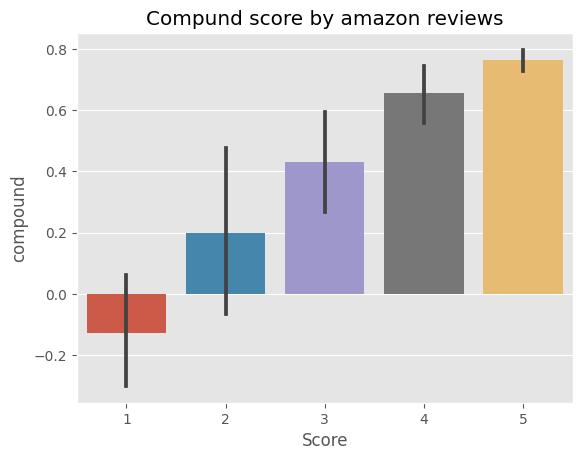

In [20]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compund score by amazon reviews')
plt.show()

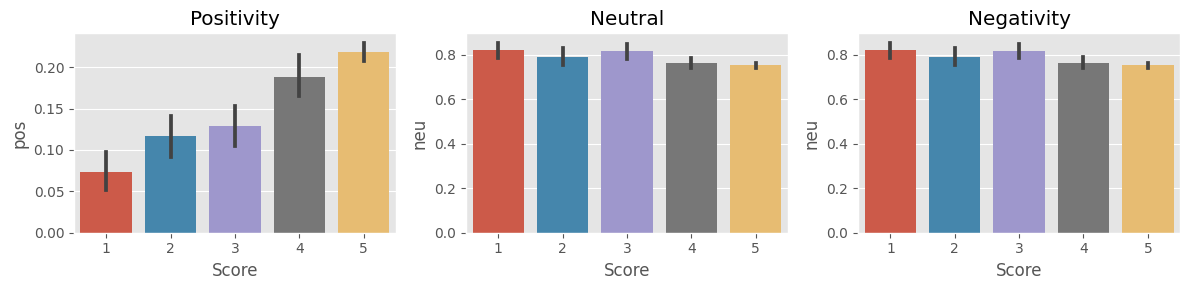

In [21]:
fig,axs=plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders,x='Score', y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[2])
axs[0].set_title('Positivity')
axs[1].set_title('Neutral')
axs[2].set_title('Negativity')
plt.tight_layout()
plt.show()

In [22]:
#Using Roberta pretrained model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [23]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [24]:
#Run a Roberta Model
def polarity_scores_roberta(example):
  encoded_text=tokenizer(example,return_tensors='pt')
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={
      'roberta_neg':scores[0],
      'roberta_neu':scores[1],
      'roberta_pos':scores[2]
      }
  return scores_dict

In [25]:
res={}
for i,row in tqdm (df.iterrows(),total=len(df)):
  try:
    text=row['Text']
    myid=row['Id']
    vader_result=sia.polarity_scores(text)
    vader_result_rename={}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"]=value
    roberta_result=polarity_scores_roberta(text)
    both={**vader_result_rename,**roberta_result}
    res[myid]=both
  except RuntimeError:
    print(f"Broke of id {myid}")

  0%|          | 0/500 [00:00<?, ?it/s]

Broke of id 83
Broke of id 187


In [26]:
result_df=pd.DataFrame(res).T
result_df=result_df.reset_index().rename(columns={'index':'Id'})
result_df=result_df.merge(df1,how='left')

In [28]:
result_df.shape

(498, 17)

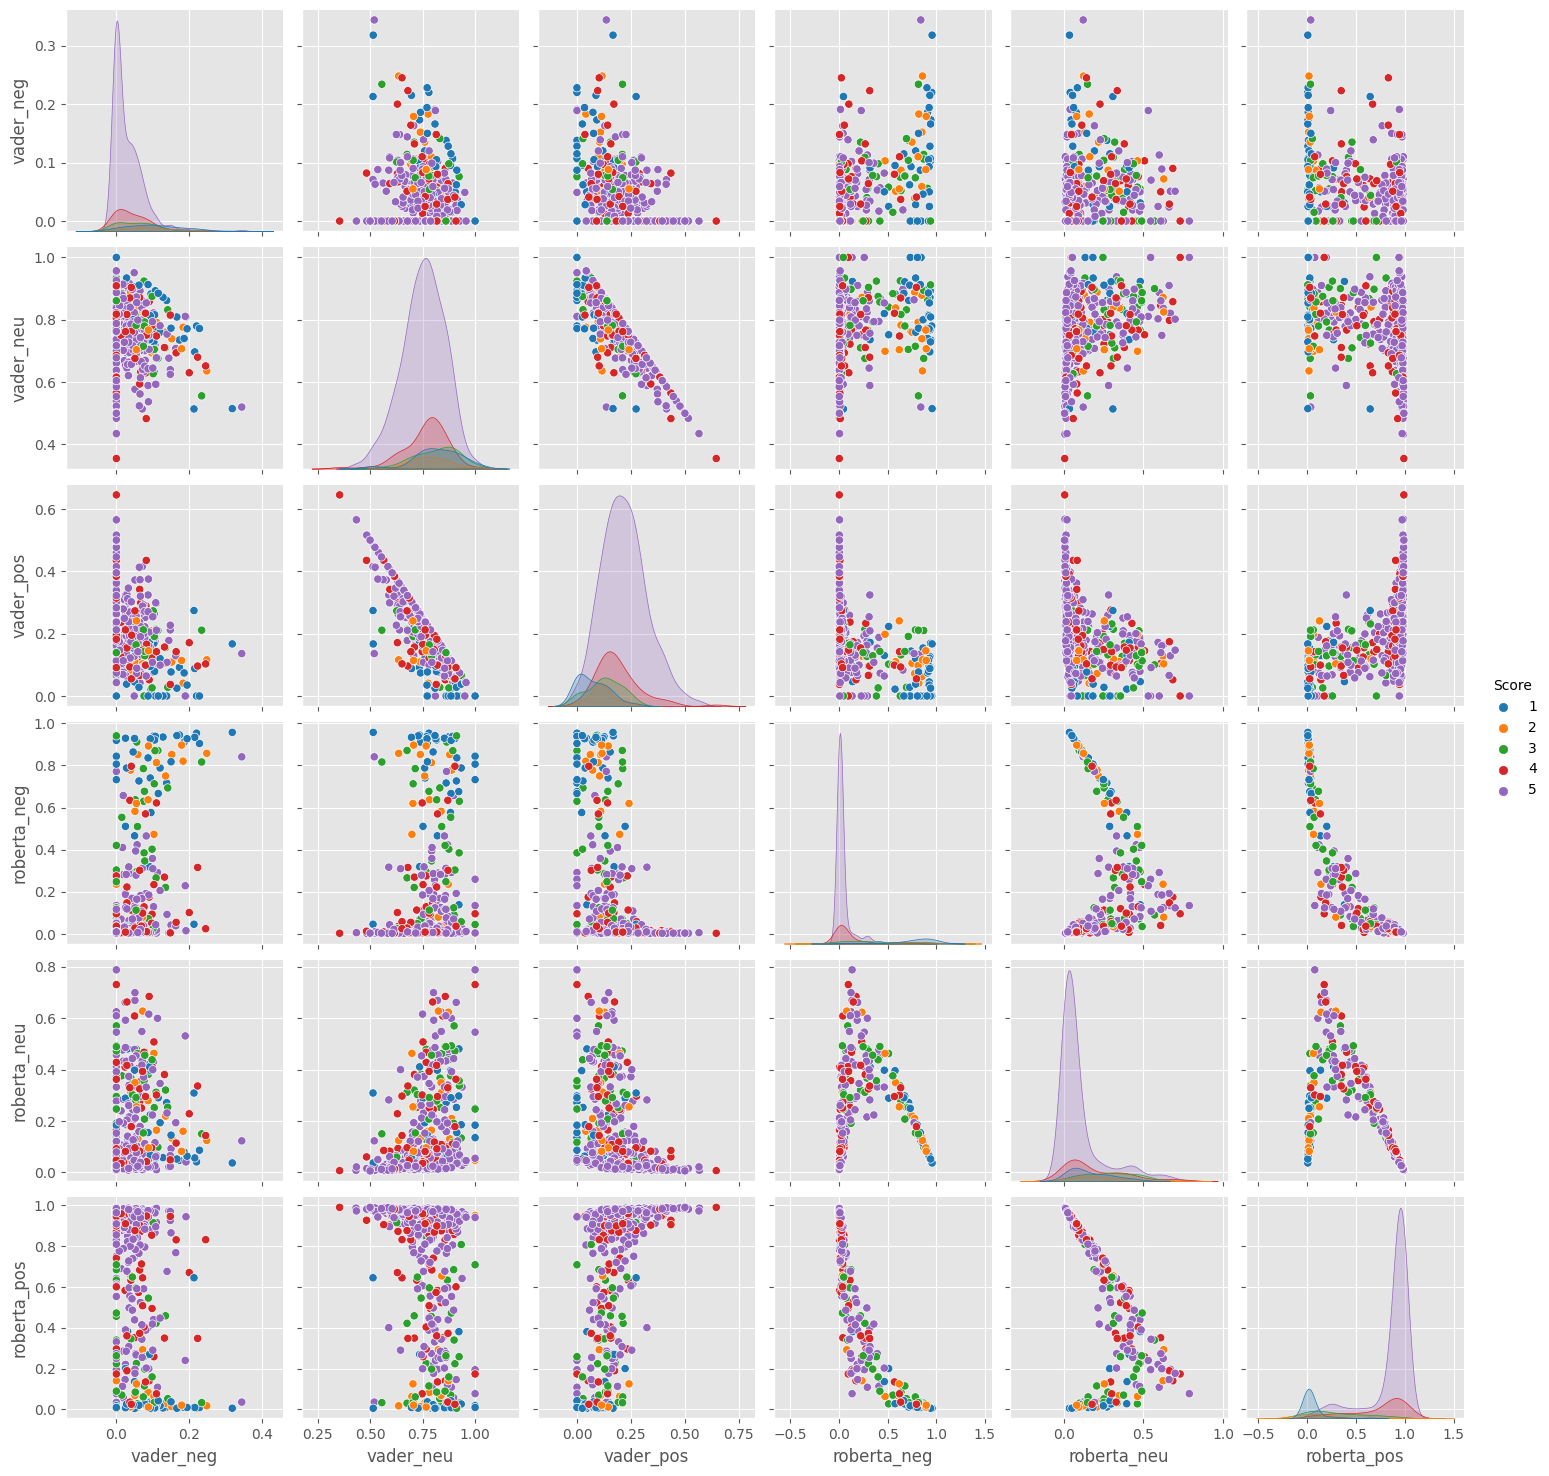

In [29]:
sns.pairplot(data=result_df,
             vars=['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

In [31]:
result_df.query('Score==1').sort_values('roberta_pos',ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [32]:
from transformers import pipeline
sent_pipeline=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [34]:
sent_pipeline("I hate pakistan")

[{'label': 'NEGATIVE', 'score': 0.9986411929130554}]